In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
training = pd.read_csv("basketball.csv")

In [35]:
Basket = pd.read_csv('basketball.csv')

In [38]:
Basket.head(5)

height  weight  success_field_goals  success_free_throws  avg_points_scored
0     6.8     225                0.442                0.672                9.2
1     6.3     180                0.435                0.797               11.7
2     6.4     190                0.456                0.761               15.8
3     6.2     180                0.416                0.651                8.6
4     6.9     205                0.449                0.900               23.2

In [39]:

minimo = Basket['avg_points_scored'].min()

In [5]:
minimo

2.8

In [40]:
maximo = Basket['avg_points_scored'].max()

In [7]:
maximo

27.4

In [41]:
Basket.describe()

height      weight  success_field_goals  success_free_throws  \
count  54.000000   54.000000            54.000000            54.000000   
mean    6.587037  209.907407             0.449111             0.741852   
std     0.458894   30.265036             0.056551             0.100146   
min     5.700000  105.000000             0.291000             0.244000   
25%     6.225000  185.000000             0.415250             0.713000   
50%     6.650000  212.500000             0.443500             0.753500   
75%     6.900000  235.000000             0.483500             0.795250   
max     7.600000  263.000000             0.599000             0.900000   

       avg_points_scored  
count          54.000000  
mean           11.790741  
std             5.899257  
min             2.800000  
25%             8.150000  
50%            10.750000  
75%            13.600000  
max            27.400000

In [9]:
%matplotlib inline

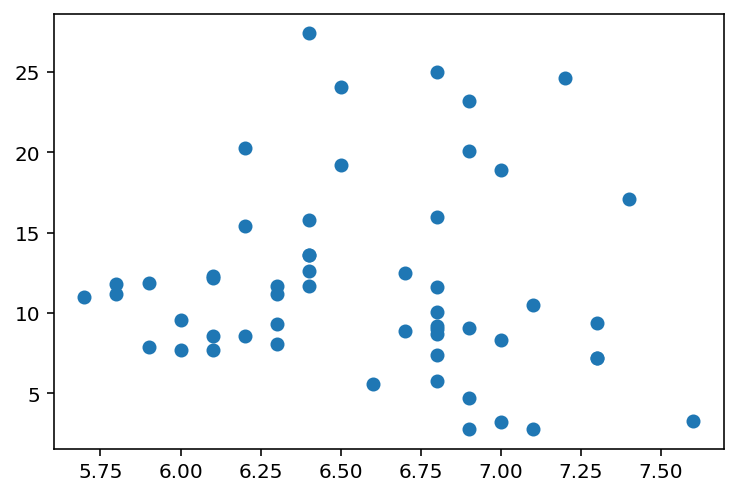

In [10]:
plt.plot(Basketb['height'],Basketb['avg_points_scored'],'o')

In [11]:

y= Basketb.avg_points_scored
x= Basketb.height

In [12]:
m, b = np.polyfit(x,y,1)

In [13]:
m

-0.8858119431216707

In [14]:

print ('EL PORCENTAJE DE TIROS DE CAMPO EXISTOSOS {:.2f}.'.format(m))
print ('EL PORCENTAJE DE OBJETICOS DE CAMPO DE EXITO{:.2f}.'.format(b))
print ('EL MEJOR AJUSTE DE REGRESION SIMPLE ES  {:.2f}x {:.2f}.+ '.format(m,b))

EL PORCENTAJE DE TIROS DE CAMPO EXISTOSOS -0.89.
EL PORCENTAJE DE OBJETICOS DE CAMPO DE EXITO17.63.
EL MEJOR AJUSTE DE REGRESION SIMPLE ES  -0.89x 17.63.+ 


In [15]:

y_mean = y.mean()
x_mean = x.mean()

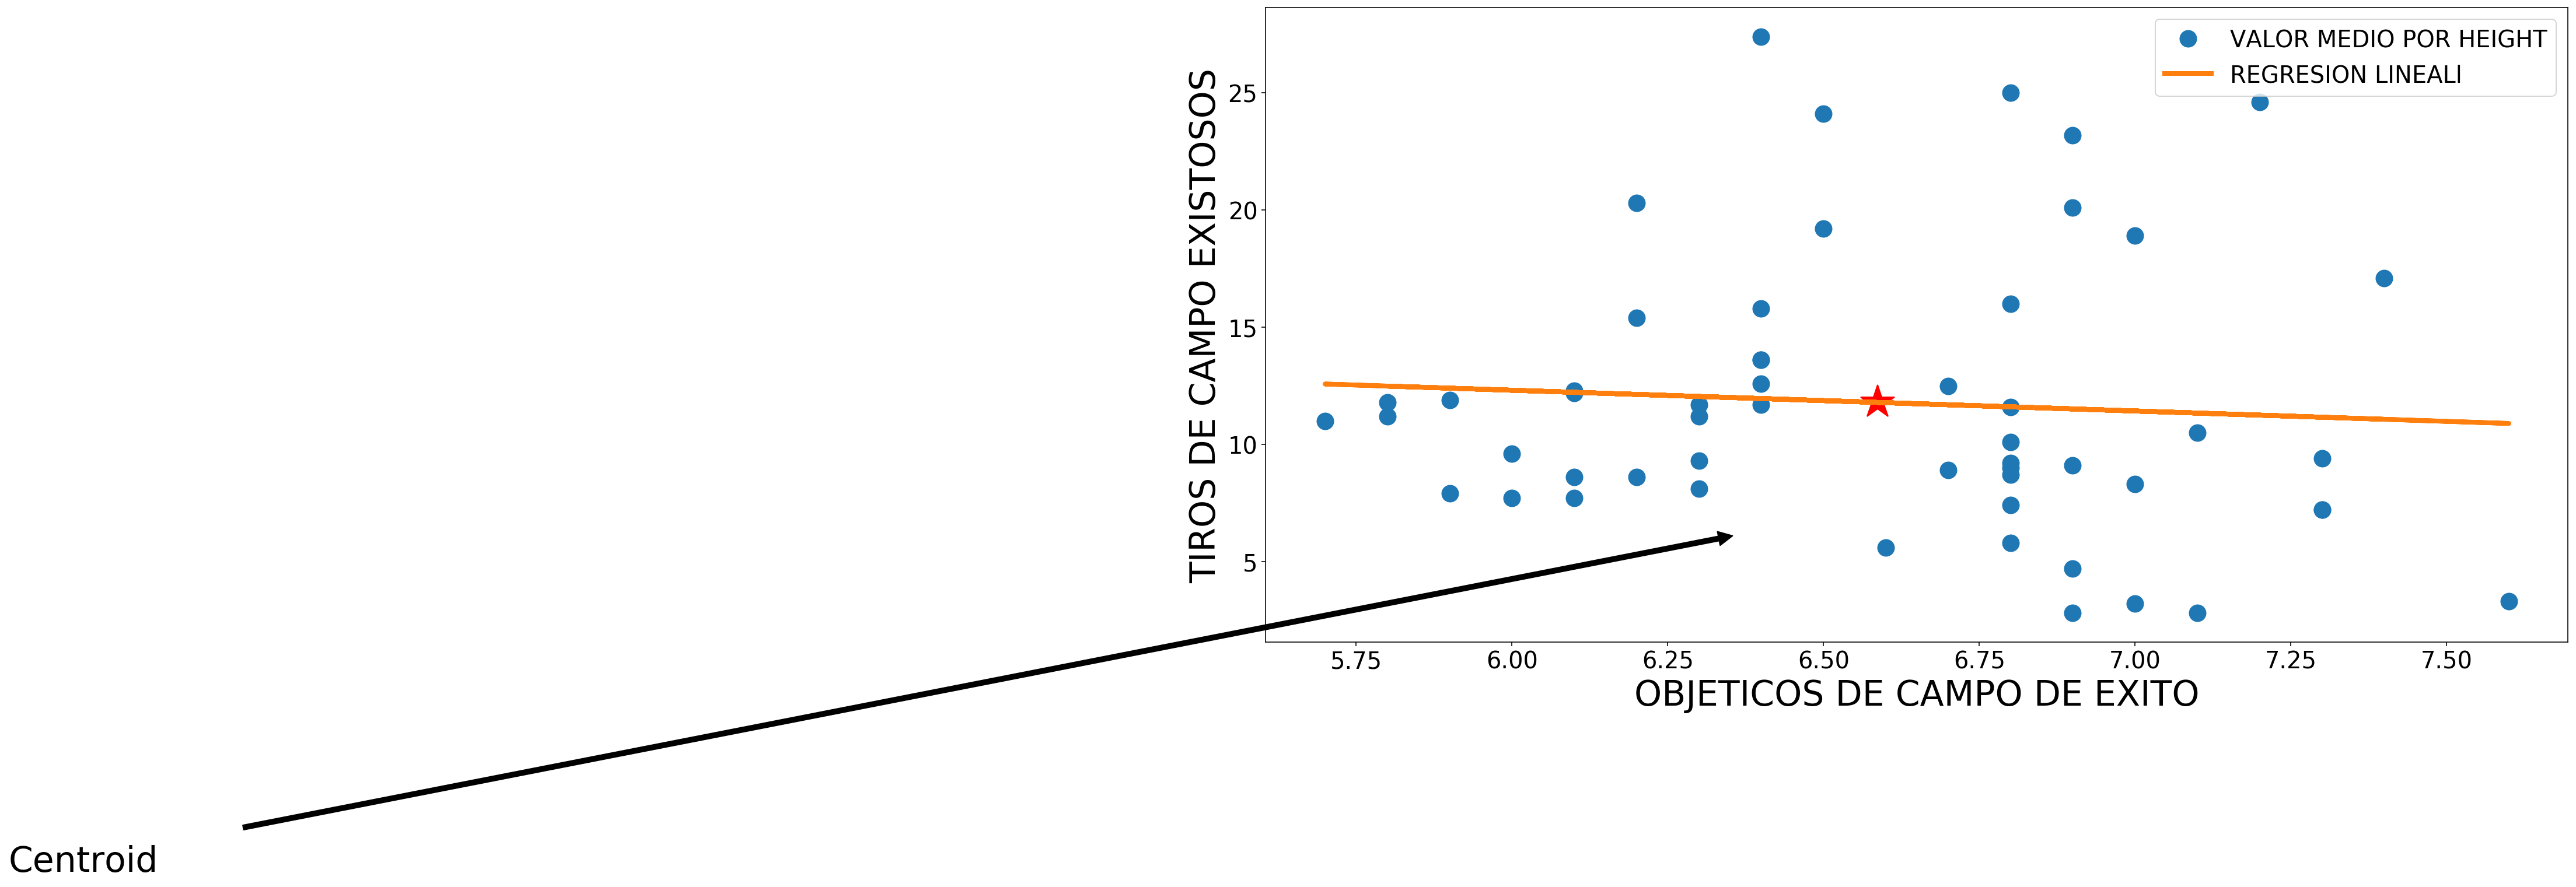

In [16]:

%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(x,y, 'o', markersize = 14, label = "VALOR MEDIO POR HEIGHT")
plt.plot(x_mean,y_mean, '*', markersize = 30, color = "r")
plt.plot(x, m*x + b, '-', label = 'REGRESION LINEALl', linewidth = 4)
plt.ylabel('TIROS DE CAMPO EXISTOSOS', fontsize = 30)
plt.xlabel('OBJETICOS DE CAMPO DE EXITO', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.annotate('Centroid', xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 30)
plt.legend(loc = 'upper right', fontsize = 20)

In [17]:

def predict(query):
    if query >= 1:
        predict = m* query +b
        return predict
    else:
        print("DEBE TENER CAMPO POR LO MENOS UN  TIRO DE CAMPO EXITOSO")

In [18]:
predict(5)

13.196557102324576

In [19]:
training.head()

height  weight  success_field_goals  success_free_throws  avg_points_scored
0     6.8     225                0.442                0.672                9.2
1     6.3     180                0.435                0.797               11.7
2     6.4     190                0.456                0.761               15.8
3     6.2     180                0.416                0.651                8.6
4     6.9     205                0.449                0.900               23.2

In [20]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
height                 54 non-null float64
weight                 54 non-null int64
success_field_goals    54 non-null float64
success_free_throws    54 non-null float64
avg_points_scored      54 non-null float64
dtypes: float64(4), int64(1)
memory usage: 2.2 KB


In [21]:
missing_values_count = training.isnull().sum()

In [22]:
missing_values_count[0:15]

height                 0
weight                 0
success_field_goals    0
success_free_throws    0
avg_points_scored      0
dtype: int64

In [23]:
training["weight"].fillna(training["weight"].mean(), inplace=True)

In [24]:

training["weight"].mean()

209.90740740740742

In [25]:
training.describe()

height      weight  success_field_goals  success_free_throws  \
count  54.000000   54.000000            54.000000            54.000000   
mean    6.587037  209.907407             0.449111             0.741852   
std     0.458894   30.265036             0.056551             0.100146   
min     5.700000  105.000000             0.291000             0.244000   
25%     6.225000  185.000000             0.415250             0.713000   
50%     6.650000  212.500000             0.443500             0.753500   
75%     6.900000  235.000000             0.483500             0.795250   
max     7.600000  263.000000             0.599000             0.900000   

       avg_points_scored  
count          54.000000  
mean           11.790741  
std             5.899257  
min             2.800000  
25%             8.150000  
50%            10.750000  
75%            13.600000  
max            27.400000

In [26]:
missing_values_count[0:15]

height                 0
weight                 0
success_field_goals    0
success_free_throws    0
avg_points_scored      0
dtype: int64

In [27]:
training["weight"].mean()

209.90740740740742

In [28]:
training = training.dropna()

In [29]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 5 columns):
height                 54 non-null float64
weight                 54 non-null int64
success_field_goals    54 non-null float64
success_free_throws    54 non-null float64
avg_points_scored      54 non-null float64
dtypes: float64(4), int64(1)
memory usage: 2.5 KB


In [30]:
y = training["weight"]

In [31]:
bins = [0,8,15,18,25,40,60,100]
names = ['1','2','3','4','5','6','7']
training["weight"] = pd.cut(training["weight"], bins, labels = names)

In [32]:
x_input= training.drop(['weight'], axis=1)

In [33]:
x_input.head()

height  success_field_goals  success_free_throws  avg_points_scored
0     6.8                0.442                0.672                9.2
1     6.3                0.435                0.797               11.7
2     6.4                0.456                0.761               15.8
3     6.2                0.416                0.651                8.6
4     6.9                0.449                0.900               23.2

In [34]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_input,y, test_size=0.30)